# Importing libraries

In [5]:
import sys
!{sys.executable} -m pip -q install  numpy pandas keras tensorflow matplotlib gensim nltk sklearn

In [6]:
import numpy as np
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.layers import Dense
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.corpus import brown
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

nltk.download('brown')
nltk.download('stopwords')

Using TensorFlow backend.
/Users/fberque/anaconda3/envs/jupyterlab-ext/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/fberque/anaconda3/envs/jupyterlab-ext/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/fberque/anaconda3/envs/jupyterlab-ext/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

True

# Read data

This is about how we would read our data if files were contained in the folder data :

In [7]:
#import os
#
#path = '/path/to/data'
#all_texts = []
#
#for filename in os.listdir(path):
#  f = open(filename, 'r')
#  all_texts.append(f.read())

Then we would work on / analyze elements of the "all_texts" Python list.

In [8]:
stop_words = set(stopwords.words('english'))

Let's just consider the first two categories of text in the brown corpus. Let's also say that "ca" files represent CV, and "cb" files represent job offers.

In [9]:
train_ids = brown.fileids()[0:71].copy()
test_ids = ['ca01', 'cb01']
for id_ in test_ids:
  train_ids.remove(id_)

In [10]:
train_texts = [" ".join(brown.words(fileids=[id_])) for id_ in train_ids]
test_texts = [" ".join(brown.words(fileids=[id_])) for id_ in test_ids]

In [11]:
for i in range(len(train_ids)):
  train_ids[i] = train_ids[i].replace('ca','CV').replace('cb','Job_offer')

for i in range(len(test_ids)):
  test_ids[i] = test_ids[i].replace('ca','CV').replace('cb','Job_offer')

We aren't really working with CV and offers, but we would handle the problem in the same way.

In [12]:
test_texts

["The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place . The jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election , `` deserves the praise and thanks of the City of Atlanta '' for the manner in which the election was conducted . The September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. . `` Only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' . The jury said it did find that many of Georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' . It recommended that Fulton legislators act `` to have 

# Cleaning data

In [13]:
clean_train = [text.lower().translate(str.maketrans('', '', string.punctuation)).split() for text in train_texts]
clean_test = [text.lower().translate(str.maketrans('', '', string.punctuation)).split() for text in test_texts]

We can also remove stopwords to make the data cleaner, if we want.

In [14]:
tagged_data = [TaggedDocument(txt, [id_]) for txt, id_ in zip(clean_train, train_ids)]

# Training Doc2Vec model

In [16]:
max_epochs = 100
vec_size = 30
alpha = 0.025

model = Doc2Vec(vector_size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=len(train_ids),
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

#model.save("d2v.model")
#print("Model Saved")

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

# Testing Doc2Vec model

## Infer vectors for new texts

In [17]:
CV_test_vector = model.infer_vector(clean_test[0])
CV_test_vector

array([-7.77396023e-01, -6.91408575e-01,  2.07484156e-01, -1.09965995e-01,
        1.23975527e+00,  5.80110431e-01, -2.39451766e+00, -4.40256238e-01,
        7.96346962e-01, -8.74117553e-01,  3.14097494e-01,  4.32023406e-01,
       -1.38902009e+00,  2.18460679e+00, -1.26116961e-01, -7.69089609e-02,
       -1.01157153e+00, -2.19358826e+00,  1.74588633e+00,  2.93224311e+00,
        1.73952746e+00, -8.06907356e-01, -7.47252047e-01,  9.59664524e-01,
       -2.34878715e-02,  1.89490998e+00,  1.13417697e+00, -3.54520583e+00,
       -3.34041985e-03, -9.31795299e-01], dtype=float32)

In [18]:
offer_test_vector = model.infer_vector(clean_test[1])
offer_test_vector

array([ 1.1634356 , -0.7122881 ,  0.4318654 ,  0.9812417 ,  1.6839886 ,
        2.1082761 , -1.6948245 ,  0.07221095, -0.7551077 ,  1.0762558 ,
        0.64251226,  0.23877004, -0.10593203,  1.2302943 ,  0.8427754 ,
        0.49554455,  0.7150757 , -1.489252  ,  1.698507  ,  2.5884194 ,
        1.8236828 ,  0.15556833, -0.72249025, -0.17105412, -0.09659887,
        0.40175408,  1.8451961 , -2.2682948 , -0.29935586,  0.2951496 ],
      dtype=float32)

## Get list of most similar texts used during training

In [19]:
model.docvecs.most_similar([CV_test_vector])

[('CV05', 0.7534013986587524),
 ('CV09', 0.7182325720787048),
 ('CV24', 0.7114962339401245),
 ('CV03', 0.7108877301216125),
 ('CV02', 0.6704344153404236),
 ('CV10', 0.6617944836616516),
 ('CV06', 0.654888391494751),
 ('CV19', 0.633774995803833),
 ('Job_offer04', 0.6177676320075989),
 ('CV07', 0.6164892315864563)]

In [20]:
model.docvecs.most_similar([offer_test_vector])

[('Job_offer06', 0.7539730668067932),
 ('CV06', 0.7236578464508057),
 ('Job_offer04', 0.7225611805915833),
 ('CV35', 0.7193660736083984),
 ('Job_offer05', 0.7088514566421509),
 ('CV08', 0.7063578367233276),
 ('Job_offer17', 0.7011130452156067),
 ('Job_offer02', 0.6941385269165039),
 ('Job_offer23', 0.691922664642334),
 ('CV05', 0.691892147064209)]

Results seem good : most similar vectors to CV vector are CV vectors and vice-versa.


Then, we can use vectors to build any kind of machine learning model, for example to predict a text's category.

# Neural Network example

Using Doc2Vec vectors to build a model that tries to predict a text's category.

## Building training and test sets

In [21]:
vector_list = []
cat_list = []
for id_ in train_ids:
  vector_list.append(list(model.docvecs[id_]))
  if "CV" in id_:
    cat_list.append("CV")
  else:
    cat_list.append("Job_offer")

vector_list = np.array(vector_list)

In [22]:
train_df = pd.DataFrame(data=vector_list)
train_df["category"] = cat_list
train_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,category
18,3.138203,-0.541149,0.696394,-10.807949,-0.588833,12.004921,-2.713702,-2.469797,-1.126496,2.870621,...,0.294127,-6.566068,5.140432,-0.948015,-4.493831,2.386760,-6.616023,4.701710,-7.991816,CV
51,6.807542,4.909217,6.670892,-3.062028,-6.625687,3.975154,0.039509,3.564395,-5.502150,10.028783,...,-2.794688,0.103533,-8.608082,-1.170008,-2.951492,9.216962,-0.332598,9.255067,-1.529513,Job_offer
46,10.962099,-2.774552,-3.051184,0.401234,4.808639,6.318864,-4.160660,2.448496,1.077291,7.352852,...,1.185380,1.853764,-10.804716,2.671286,2.106773,6.155320,-5.266735,0.793064,-2.320526,Job_offer
50,4.135087,-0.863729,9.827925,3.886036,6.912225,2.263665,-4.982519,2.442621,-5.626452,10.074541,...,-4.029077,3.735214,1.131210,-6.996453,2.235239,-3.651743,-2.470428,9.327930,-4.466463,Job_offer
43,7.841818,1.469371,-3.179746,4.381052,4.498564,8.275702,-8.882046,6.928423,2.726056,2.968675,...,-2.185650,2.637648,-0.602075,-3.073181,3.157800,8.212932,-7.316852,-2.051842,0.530848,Job_offer


In [23]:
test_vectors = []
test_cats = []
for index_id in range(len(test_ids)):
  if "CV" in test_ids[index_id]:
    test_cats.append("CV")
  else:
    test_cats.append("Job_offer")
  test_vectors.append(list(model.infer_vector(clean_test[index_id])))

test_vectors = np.array(test_vectors)

In [24]:
test_df = pd.DataFrame(data=test_vectors)
test_df["category"] = test_cats
test_df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,category
0,-0.603684,-0.383341,-0.249647,-0.041038,0.892709,0.832352,-2.541869,-0.308611,1.022459,-0.683965,...,-1.102526,-0.568269,0.921837,0.052086,1.499286,1.089665,-3.800399,0.303587,-0.519082,CV
1,1.149974,-0.721057,0.336619,0.862282,1.825481,1.928258,-1.654020,-0.109224,-0.990326,0.882104,...,0.009836,-0.810495,-0.283851,0.252269,0.679305,1.809091,-2.132018,0.069842,0.085584,Job_offer


Encoding categories.

In [25]:
train_df["target"] = train_df["category"].map({"CV":0,"Job_offer":1})
#train_df = pd.concat([train_df,pd.get_dummies(train_df["category"])], axis=1)

train_df.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,category,target
33,6.613285,3.612378,4.049078,2.069019,2.093721,10.623069,-8.541397,9.202985,4.795138,4.500756,...,-9.281529,-2.795832,-5.201424,-0.308404,10.073928,-6.504033,3.229707,-4.731025,CV,0
22,-0.635859,0.083288,4.327404,-1.786149,10.880440,7.543876,3.185126,-3.289036,3.473866,-1.104072,...,4.786245,0.944203,6.076189,3.884722,11.025219,-14.540617,2.983026,-4.316332,CV,0
7,0.640764,0.581950,5.304965,0.319400,6.986187,-1.307687,-10.633467,2.642465,-1.486670,2.859022,...,-6.231623,1.999513,3.369438,3.908152,3.479602,-7.127571,4.308875,-5.984736,CV,0
18,3.138203,-0.541149,0.696394,-10.807949,-0.588833,12.004921,-2.713702,-2.469797,-1.126496,2.870621,...,-6.566068,5.140432,-0.948015,-4.493831,2.386760,-6.616023,4.701710,-7.991816,CV,0
17,3.775248,1.697307,10.084623,-4.200366,3.397465,4.057940,2.401546,2.878521,-2.848174,-0.266372,...,-2.373500,1.377015,6.148943,3.128352,-1.770272,-9.593740,-0.953245,-7.650670,CV,0
50,4.135087,-0.863729,9.827925,3.886036,6.912225,2.263665,-4.982519,2.442621,-5.626452,10.074541,...,3.735214,1.131210,-6.996453,2.235239,-3.651743,-2.470428,9.327930,-4.466463,Job_offer,1
23,3.660760,-1.141844,2.633487,-1.141512,3.457108,4.308436,-3.943509,4.543617,-0.956772,-1.860703,...,-7.193702,3.530564,2.293782,-2.685656,0.850344,-4.955568,5.431263,-9.002115,CV,0
39,10.040529,1.032083,0.509951,4.065275,3.431462,9.981113,-9.551697,-7.485539,-3.380637,3.323160,...,-7.637249,8.545069,-8.343307,-0.409112,-1.736953,-8.235658,1.330387,-3.894331,CV,0
57,4.141606,-1.781642,2.287911,4.572018,-2.175000,2.047908,-2.067831,2.451328,4.117931,7.342779,...,-1.601076,6.299685,-1.529058,-2.907796,9.217918,-7.366598,2.344799,-1.566139,Job_offer,1
60,6.936255,-0.426671,4.315260,10.149779,9.039593,3.238352,2.126988,8.485065,-0.751949,7.222723,...,0.947635,2.836636,1.198561,-0.007870,5.176079,-11.201007,6.670067,-3.678726,Job_offer,1


In [26]:
test_df["target"] = test_df["category"].map({"CV":0,"Job_offer":1})
test_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,category,target
0,-0.603684,-0.383341,-0.249647,-0.041038,0.892709,0.832352,-2.541869,-0.308611,1.022459,-0.683965,...,-0.568269,0.921837,0.052086,1.499286,1.089665,-3.800399,0.303587,-0.519082,CV,0
1,1.149974,-0.721057,0.336619,0.862282,1.825481,1.928258,-1.654020,-0.109224,-0.990326,0.882104,...,-0.810495,-0.283851,0.252269,0.679305,1.809091,-2.132018,0.069842,0.085584,Job_offer,1


In [27]:
train_df.drop(columns=["category"], inplace=True)
test_df.drop(columns=["category"], inplace=True)

In [28]:
feature_columns = []
cat_columns = []
for col in train_df.columns:
  if type(col) == int:
    feature_columns.append(col)
  else:
    cat_columns.append(col)

## Building Neural Network architecture

Very simple model: 4 fully connected layers, with 30, 20, 20 and 1 neurons respectively.

Last layer specifically has 1 neuron because we want to predict 0 if the input vector corresponds to a CV and 1 if it is a job offer. 

In [29]:
nn_model = Sequential()
nn_model.add(Dense(30, input_dim=vec_size, activation='relu'))
nn_model.add(Dense(20, activation='relu'))
nn_model.add(Dense(20, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [30]:
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,991
Trainable params: 1,991
Non-trainable params: 0
_________________________________________________________________


## Training Neural Network

In [31]:
x = train_df[feature_columns].values
y = train_df[cat_columns].values

test_x = test_df[feature_columns].values
test_y = test_df[cat_columns].values

print("X shape : " + str(x.shape))
print("Y shape : " + str(y.shape))
print("Test X shape : " + str(test_x.shape))
print("Test Y shape : " + str(test_y.shape))

X shape : (69, 30)
Y shape : (69, 1)
Test X shape : (2, 30)
Test Y shape : (2, 1)


In [32]:
nn_model.fit(x, y, batch_size=8, epochs=100, validation_data=[test_x, test_y])


Train on 69 samples, validate on 2 samples
Epoch 1/100
69/69 [==============================] - 0s 3ms/step - loss: 3.6580 - accuracy: 0.3768 - val_loss: 0.8426 - val_accuracy: 0.5000
Epoch 2/100
69/69 [==============================] - 0s 202us/step - loss: 2.2615 - accuracy: 0.3768 - val_loss: 0.8144 - val_accuracy: 0.5000
Epoch 3/100
69/69 [==============================] - 0s 210us/step - loss: 1.4623 - accuracy: 0.3768 - val_loss: 0.7802 - val_accuracy: 0.5000
Epoch 4/100
69/69 [==============================] - 0s 211us/step - loss: 1.0267 - accuracy: 0.5072 - val_loss: 0.7553 - val_accuracy: 0.0000e+00
Epoch 5/100
69/69 [==============================] - 0s 200us/step - loss: 0.7880 - accuracy: 0.5217 - val_loss: 0.7431 - val_accuracy: 0.5000
Epoch 6/100
69/69 [==============================] - 0s 230us/step - loss: 0.6479 - accuracy: 0.6087 - val_loss: 0.7400 - val_accuracy: 0.5000
Epoch 7/100
69/69 [==============================] - 0s 204us/step - loss: 0.5684 - accuracy: 0.

# T-SNE / PCA visualisations

## 2D PCA

In [33]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(vector_list)

In [34]:
principalDf = pd.DataFrame()

principalDf["file_id"] = train_ids
principalDf["category"] = cat_list
principalDf["Principal Component 1"] = principalComponents[:,0]
principalDf["Principal Component 2"] = principalComponents[:,1]

In [35]:
principalDf.head()

,file_id,category,Principal Component 1,Principal Component 2
0,CV02,CV,0.428336,-3.805122
1,CV03,CV,-8.134845,-4.224345
2,CV04,CV,-7.656389,-7.245429
3,CV05,CV,-10.517429,5.563931
4,CV06,CV,-6.094329,-0.048591


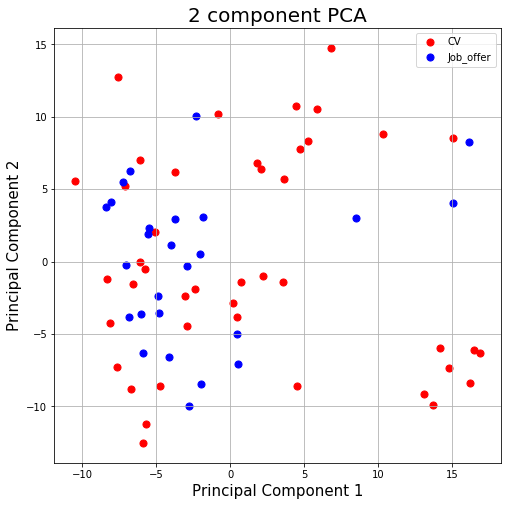

In [36]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = principalDf["category"].unique()
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf['category'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'Principal Component 1']
               , principalDf.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 3D PCA

In [37]:
pca3d = PCA(n_components=3)

PC3d = pca3d.fit_transform(vector_list)

principalDf3d = pd.DataFrame()

principalDf3d["file_id"] = train_ids
principalDf3d["category"] = cat_list
principalDf3d["Principal Component 1"] = PC3d[:,0]
principalDf3d["Principal Component 2"] = PC3d[:,1]
principalDf3d["Principal Component 3"] = PC3d[:,2]

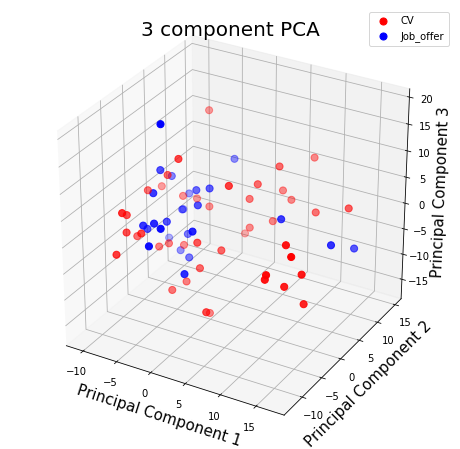

In [38]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1,  projection='3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = principalDf3d["category"].unique()
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf3d['category'] == target
    ax.scatter(principalDf3d.loc[indicesToKeep, 'Principal Component 1']
               , principalDf3d.loc[indicesToKeep, 'Principal Component 2']
               , principalDf3d.loc[indicesToKeep, 'Principal Component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## 2D T-SNE

In [39]:
tsne = TSNE(n_components=2)

tsne_values = tsne.fit_transform(vector_list)

TSNEdf = pd.DataFrame()

TSNEdf["file_id"] = train_ids
TSNEdf["category"] = cat_list
TSNEdf["TSNE Component 1"] = tsne_values[:,0]
TSNEdf["TSNE Component 2"] = tsne_values[:,1]

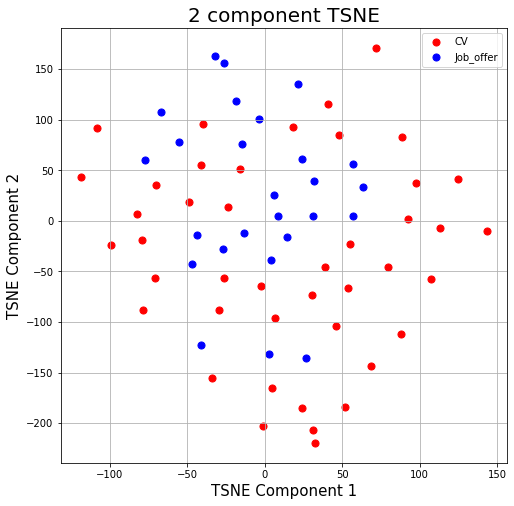

In [40]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('TSNE Component 1', fontsize = 15)
ax.set_ylabel('TSNE Component 2', fontsize = 15)
ax.set_title('2 component TSNE', fontsize = 20)

targets = principalDf["category"].unique()
colors = ['r', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = TSNEdf['category'] == target
    ax.scatter(TSNEdf.loc[indicesToKeep, 'TSNE Component 1']
               , TSNEdf.loc[indicesToKeep, 'TSNE Component 2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

## 3D TSNE

In [41]:
tsne3d = TSNE(n_components=3)

tsne_values3d = tsne3d.fit_transform(vector_list)

TSNEdf3d = pd.DataFrame()

TSNEdf3d["file_id"] = train_ids
TSNEdf3d["category"] = cat_list
TSNEdf3d["TSNE Component 1"] = tsne_values3d[:,0]
TSNEdf3d["TSNE Component 2"] = tsne_values3d[:,1]
TSNEdf3d["TSNE Component 3"] = tsne_values3d[:,2]

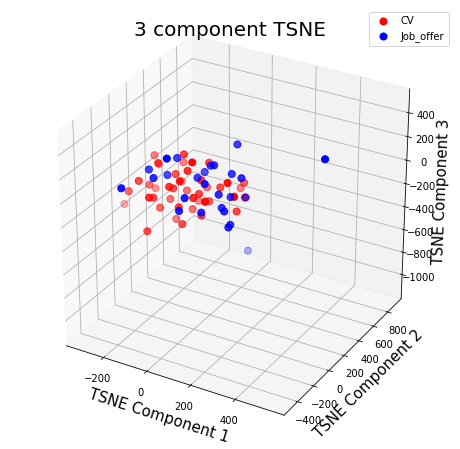

In [42]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1,  projection='3d') 
ax.set_xlabel('TSNE Component 1', fontsize = 15)
ax.set_ylabel('TSNE Component 2', fontsize = 15)
ax.set_zlabel('TSNE Component 3', fontsize = 15)
ax.set_title('3 component TSNE', fontsize = 20)

targets = principalDf3d["category"].unique()
colors = ['r', 'b']

DISPLAY_NB = 5
targets = targets[0:DISPLAY_NB]
colors = colors[0:DISPLAY_NB]

for target, color in zip(targets,colors):
    indicesToKeep = TSNEdf3d['category'] == target
    ax.scatter(TSNEdf3d.loc[indicesToKeep, 'TSNE Component 1']
               , TSNEdf3d.loc[indicesToKeep, 'TSNE Component 2']
               , TSNEdf3d.loc[indicesToKeep, 'TSNE Component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()